In [5]:
import astropy
from astropy.io import fits
import numpy
from numpy import *
import matplotlib as mpl
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import yt
import matplotlib as mpl
from IPython.display import Image
from yt.units import G
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve_fft, Gaussian2DKernel
from matplotlib.colors import LogNorm
plt.rcParams['text.usetex'] = True
import trident
%matplotlib inline

In [6]:
DDname = 'DD0600'

In [7]:
ds_n = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_selfshield_z15/%s/%s'%(DDname, DDname))
ds_f = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_nref10f_selfshield_z6/%s/%s'%(DDname, DDname))

ad_n = ds_n.all_data()
ad_f = ds_f.all_data()

yt : [INFO     ] 2019-02-11 16:48:38,235 Parameters: current_time              = 183.06652781829
yt : [INFO     ] 2019-02-11 16:48:38,236 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-02-11 16:48:38,237 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-02-11 16:48:38,239 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-02-11 16:48:38,240 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-11 16:48:38,241 Parameters: current_redshift          = 1.6720386378662
yt : [INFO     ] 2019-02-11 16:48:38,241 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-02-11 16:48:38,242 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-02-11 16:48:38,243 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2019-02-11 16:48:38,277 Parameters: current_time              = 183.06652781829
yt : [INFO     ] 2019-02-11 16:48:38,277 Parameters: domain_dimensions         = [256 

In [8]:
trident.add_ion_fields(ds_n, ions=['C IV', 'O VI', 'Mg II', 'Si II', 'C II', 'Si III', 'Si IV', 'Ne VIII'])

Parsing Hierarchy : 100%|██████████| 1177/1177 [00:00<00:00, 5152.95it/s]
yt : [INFO     ] 2019-02-11 16:48:50,519 Gathering a field list (this may take a moment.)


In [21]:
ad_n = ds_n.all_data()
ad_n['gas', 'C_p1_mass'].max()

2.756302385889957e+37 g

In [22]:
ds_n.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('al

In [4]:
gp_n = np.load('/Users/rsimons/Dropbox/rcs_foggie/galprops/halo_008508/nref11n_selfshield_z15_%s_galprops.npy'%DDname, encoding = 'latin1')[()]
gp_f = np.load('/Users/rsimons/Dropbox/rcs_foggie/galprops/halo_008508/nref11n_nref10f_selfshield_z6_%s_galprops.npy'%DDname, encoding = 'latin1')[()]

In [5]:
cen_n = yt.YTArray([gp_n['stars_center'][0][0], gp_n['stars_center'][0][1], gp_n['stars_center'][0][2]], 'kpc')
cen_f = yt.YTArray([gp_f['stars_center'][0][0], gp_f['stars_center'][0][1], gp_f['stars_center'][0][2]], 'kpc')


In [43]:
gas_x_n_gal = ad_n['gas', 'x'] - cen_n[0]
gas_y_n_gal = ad_n['gas', 'y'] - cen_n[1]
gas_z_n_gal = ad_n['gas', 'z'] - cen_n[2]

gas_x_f_gal = ad_f['gas', 'x'] - cen_f[0]
gas_y_f_gal = ad_f['gas', 'y'] - cen_f[1]
gas_z_f_gal = ad_f['gas', 'z'] - cen_f[2]


gas_vx_n = ad_n['gas', 'velocity_x'].to('km/s')
gas_vy_n = ad_n['gas', 'velocity_y'].to('km/s')
gas_vz_n = ad_n['gas', 'velocity_z'].to('km/s')



gas_vx_f = ad_f['gas', 'velocity_x']
gas_vy_f = ad_f['gas', 'velocity_y']
gas_vz_f = ad_f['gas', 'velocity_z']


r_n_gal = sqrt(gas_x_n_gal**2. + gas_y_n_gal**2. + gas_z_n_gal**2.).to('kpc')
r_f_gal = sqrt(gas_x_f_gal**2. + gas_y_f_gal**2. + gas_z_f_gal**2.).to('kpc')


v_n_box = sqrt(gas_vx_n**2. + gas_vy_n**2. + gas_vz_n**2.).to('km/s')
v_f_box = sqrt(gas_vx_f**2. + gas_vy_f**2. + gas_vz_f**2.).to('km/s')


temp_n = ad_n['gas', 'temperature']
temp_f = ad_f['gas', 'temperature']






Parsing Hierarchy : 100%|██████████| 4254/4254 [00:00<00:00, 5986.59it/s]
yt : [INFO     ] 2019-02-11 13:48:57,610 Gathering a field list (this may take a moment.)


In [47]:
gas_dn_n = ad_n['gas', 'density']
gas_dn_f = ad_f['gas', 'density']

In [45]:
dx_n = ad_n['gas', 'dx']
dx_f = ad_f['gas', 'dx']
A_n = dx_n**2.
A_f = dx_f**2.
V_n = dx_n**3.
V_f = dx_f**3.


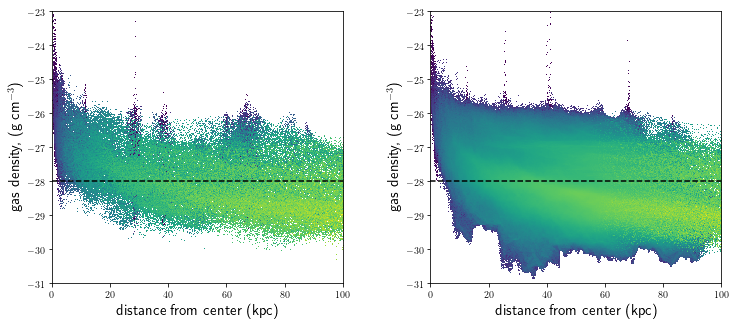

In [94]:

plt.rcParams['text.usetex'] = True
fig, axes = plt.subplots(1,2, figsize = (12,5))
mnd = -31
mxd = -23
bns = 500
mnr = 0
mxr = 100


gd_n = where(temp_n > 2.e4)
gd_f = where(temp_f > 2.e4)


pl = axes[0].hist2d(r_n_gal[gd_n], log10(gas_dn_n.to('g/cm**3').value[gd_n]), weights = V_n[gd_n], 
       norm = LogNorm(),
       bins = [linspace(mnr, mxr, bns), linspace(mnd, mxd, bns)])


pl =  axes[1].hist2d(r_f_gal[gd_f], log10(gas_dn_f.to('g/cm**3').value[gd_f]), weights = V_f[gd_f],
       norm = LogNorm(),
       bins = [linspace(mnr, mxr, bns), linspace(mnd, mxd, bns)])



for ax in axes:
    ax.axhline(y = -28, color = 'black', linestyle = '--')
    ax.set_xlabel('distance from center (kpc)', fontsize = 15)
    ax.set_ylabel('gas density, (g cm$^{-3}$)', fontsize = 15)

fig.subplots_adjust(wspace = 0.3)



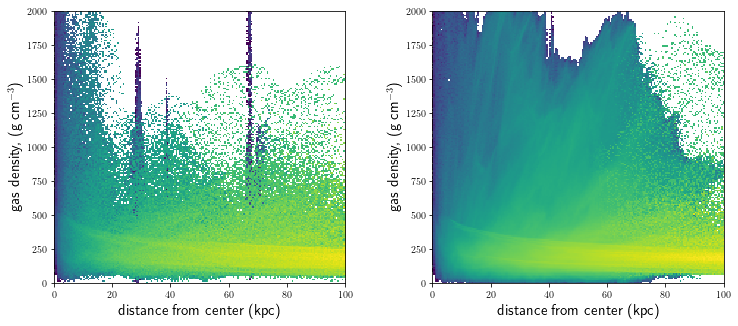

In [88]:
plt.rcParams['text.usetex'] = True
fig, axes = plt.subplots(1,2, figsize = (12,5))
mnv = 0
mxv = 2000
bns = 200
mnr = 0
mxr = 100


pl = axes[0].hist2d(r_n_gal, v_n_box.value, weights = V_n, 
       norm = LogNorm(),
       bins = [linspace(mnr, mxr, bns), linspace(mnv, mxv, bns)])


pl =  axes[1].hist2d(r_f_gal, v_f_box.value, weights = V_f, 
       norm = LogNorm(),
       bins = [linspace(mnr, mxr, bns), linspace(mnv, mxv, bns)])



for ax in axes:
    ax.axhline(y = -28)
    ax.set_xlabel('distance from center (kpc)', fontsize = 15)
    ax.set_ylabel('gas density, (g cm$^{-3}$)', fontsize = 15)

fig.subplots_adjust(wspace = 0.3)



In [40]:
hists = []
r_min = 0
r_max = 100
dr = 100
bins = linspace(-32, -20, dr)
for r in linspace(r_min, r_max, dr):
    r1 = yt.YTArray(r + dr, 'kpc')
    sp1 = ds_n.sphere(cen_n, r1)
    if r == 0: 
        sh = sp1
    else: 
        r0 = yt.YTArray(r, 'kpc')
        sp0 = ds_n.sphere(cen_n, r0)
        sh = sp1 - sp0


    
    x = log10(sh['gas', 'density'].to('g/cm**3').value)
        
    h, xbins = histogram(x, bins = bins)
    
    hists.append(h)
    

<function numpy.lib.twodim_base.histogram2d(x, y, bins=10, range=None, normed=None, weights=None, density=None)>

35463
35463


In [9]:
x = sp['gas', 'density']

In [29]:
h, xbins = histogram(log10(x),bins = linspace(-32, -20, 200))

In [30]:
h

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,    0,    7,   31,
         25,   68,  123,   91,   90,  127,  135,  157,  208,  228,  296,
        331,  467,  493,  582,  693,  850, 1317, 1578, 1763, 1726, 1980,
       2229, 2530, 2497, 2777, 2823, 2981, 3305, 3518, 3693, 3880, 3927,
       3787, 3642, 3754, 3804, 3701, 3793, 3694, 3617, 3674, 3931, 3878,
       3894, 3539, 3175, 3367, 3232, 3259, 3379, 3072, 2816, 2558, 2300,
       2167, 1910, 1703, 1639, 1628, 1537, 1605, 1567, 1506, 1552, 1554,
       1503, 1484, 1404, 1398, 1293, 1367, 1195, 1153, 1173, 1085, 1053,
        992,  922,  879,  918,  881,  836,  821,  852,  766,  749,  711,
        738,  686,  638,  541,  501,  481,  391,  379,  377,  388,  285,
        308,  306,  277,  246,  218,  207,  180,  1

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.900e+01, 4.200e+01, 1.580e+02, 1.370e+02, 1.690e+02, 2.090e+02,
        2.570e+02, 3.640e+02, 4.710e+02, 6.890e+02, 7.940e+02, 1.045e+03,
        1.700e+03, 2.389e+03, 2.628e+03, 3.009e+03, 3.635e+03, 3.839e+03,
        4.264e+03, 4.494e+03, 5.229e+03, 5.606e+03, 5.957e+03, 5.636e+03,
        5.585e+03, 5.640e+03, 5.712e+03, 5.606e+03, 5.440e+03, 5.879e+03,
        5.877e+03, 5.179e+03, 4.983e+03, 4.897e+03, 5.036e+03, 4.564e+03,
        3.926e+03, 3.459e+03, 2.946e+03, 2.562e+03, 2.435e+03, 2.299e+03,
        2.444e+03, 2.282e+03, 2.340e+03, 2.260e+03, 2.165e+03, 2.055e+03,
        1.980e+03, 1.761e+03, 1.765e+03, 1.642e+03, 1.502e+03, 1.356e+03,
        1.356e+03, 1.311e+03, 1.261e+03, 1.193e+03, 1.138e+03, 1.108e+03,
        1.041e+03, 8.940e+02, 7.660e+02, 6.570e+02, 5.730e+02, 5.720e+02,
        4.730e+02, 4.770e+02, 4.170e+02, 3.320e+02, 3.020e+02, 2.810e+02,
        2.890e+02, 2.800e+02, 2.440e+0

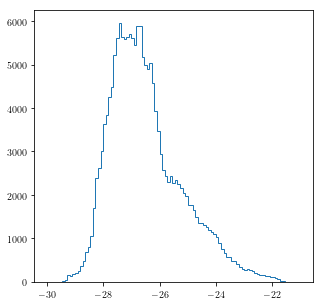

In [15]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
ax.hist(log10(x.value), bins = linspace(-30, -21, 100), histtype = 'step')

In [31]:
x

YTArray([4.10337062e-28, 4.11433136e-28, 4.16953495e-28, ...,
         1.75925143e-28, 1.15214800e-28, 2.14236584e-28]) g/cm**3